# Introduction
<ul>
<li>This dataset contains house sale prices for King County, which includes Seattle.</li>
<li>It includes homes sold between May 2014 and May 2015.</li>
<li>21 columns. (features)</li>
<li>21597 rows.</li>
</ul>

## Columns Descriptions

<ul>
<li>ID - Unique ID for each home sold.</li>
<li>date- Date of the home sale.</li>
<li>price - Price of each home sold.</li>
<li>bedrooms - Number of bedrooms.</li>
<li>bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.</li>
<li>sqft_living - Square footage of the apartments interior living space.</li>
<li>sqft_lot - Square footage of the land space.</li>
<li>floors - Number of floors.</li>
<li>waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.</li>
<li>view - An index from 0 to 4 of how good the view of the property was.</li>
<li>condition - An index from 1 to 5 on the condition of the apartment.</li>
<li>grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.</li>
<li>sqft_above - The square footage of the interior housing space that is above ground level.</li>
<li>sqft_basement - The square footage of the interior housing space that is below ground level.</li>
<li>yr_built - The year the house was initially built.</li>
<li>yr_renovated - The year of the house’s last renovation.</li>
<li>zipcode - What zipcode area the house is in.</li>
<li>lat - Lattitude.</li>
<li>long - Longitude.</li>
<li>sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors.</li>
<li>sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors.</li>
</ul>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

#import the dataset
df_org = pd.read_csv('kc_house_data.csv',parse_dates=['date'])

## **Wrangling**

### Clean duplicates

In [2]:
print(f'number of ids duplicates records: {df_org.id.duplicated().sum()}')
df_org.id.drop_duplicates(inplace=True)

number of ids duplicates records: 177


### **Clean Outliers**

Outliers can skew statistical measures and data distributions, providing a misleading representation of the underlying data and relationships. Removing outliers from training data prior to modeling can result in a better fit of the data and, in turn, more skillful predictions.

Identifying and removing outliers is challenging with simple statistical methods for most machine learning datasets given the large number of input variables. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset. **Local Outlier Factor** The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers. 

In [3]:
from sklearn.neighbors import LocalOutlierFactor
df = df_org.copy()
lof = LocalOutlierFactor(n_neighbors=400, contamination=0.03)
yhat = lof.fit_predict(df.drop(columns=['date'],axis=1))
# select all rows that are not outliers
df['good'] = yhat != -1 
df = df.query('good == True')
df.drop(columns=['good'],axis=1,inplace=True)
df.reset_index(inplace=True)

In [4]:
print(f'dataframe with outliers: {df_org.shape[0]}')
print(f'dataframe without outliers: {df.shape[0]}')
print(f'number of outliers {df_org.shape[0] - df.shape[0]}')

dataframe with outliers: 21613
dataframe without outliers: 20964
number of outliers 649


# Exploration

*In this section we will explore the relations amung independent variables and relations them and the dependent variable which is price. To show the relations between the variables, correlation matrix comes as the best tool for this job.*<br> 

*A **correlation matrix** is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. In correlation matrix both +1,-1 means that these variables are completely correlated. Postive fraction means postive correlation and negative means negative correlation, The more the fraction comes close to +1,-1 the more the correlation, Zero or too small fraction means that these variables are not corrleated with each other.*

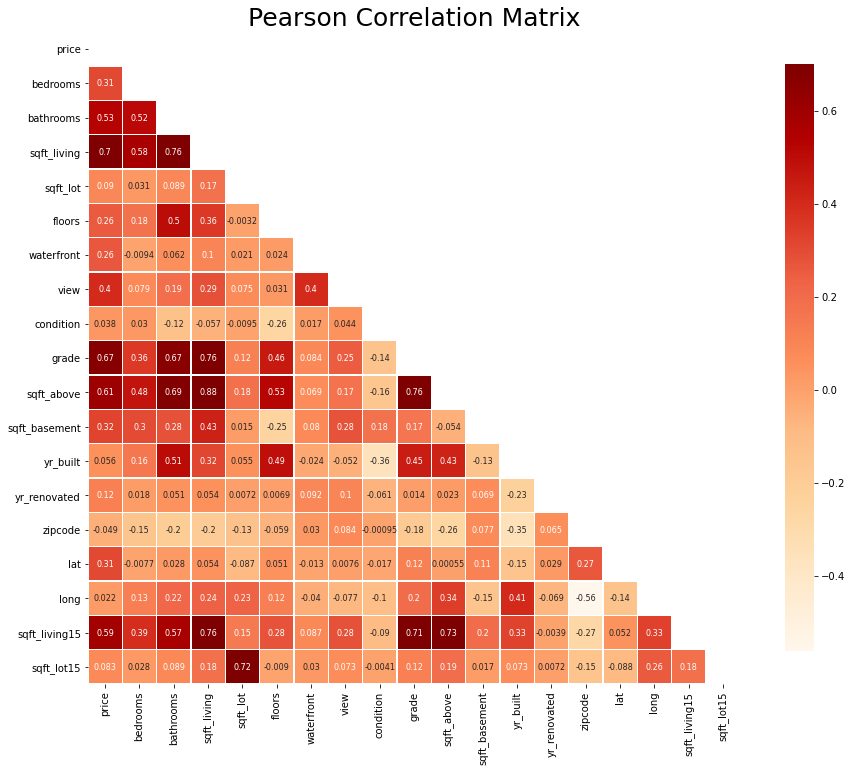

In [5]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="OrRd",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

**Notes:**
<ul>
<li> price has a high positive correlation with sqft_living, grade, sqft_above, sqft_living_15 </li>
2. sqft_living and sqft_above is highly correlated.
3. sqft_living and sqft_above have the same corr coeff with grade
4. condiction, sqft_lot will not add much to the model as it has very low corr coeff.
<li>sqft_living highly correlated grade, sqft_above,  </li>
<li>sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms.</li>
</ul>

 # Price & sqft_living & Grade

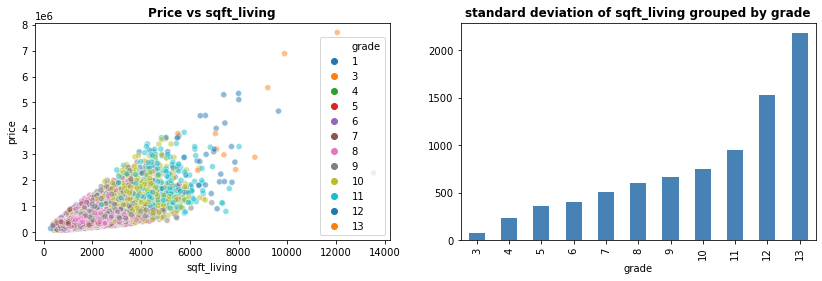

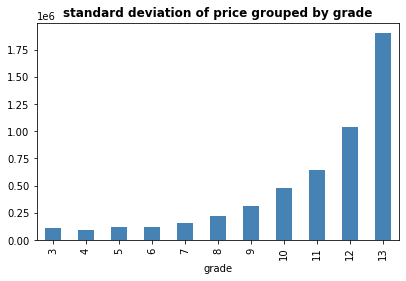

In [6]:
fig, axes = plt.subplots(figsize=(14,4),nrows=1,ncols=2)
price_sqft_living = sns.scatterplot(data=df,x='sqft_living',y='price',hue='grade',alpha=0.5,palette="tab10",ax=axes[0])
grade_sqft_living = df.groupby('grade')['sqft_living'].std().dropna().plot(ax=axes[1],kind='bar',color='steelblue')
price_sqft_living.set_title('Price vs sqft_living', fontweight= 'bold')
grade_sqft_living.set_title('standard deviation of sqft_living grouped by grade',fontweight='bold')

fig, axes = plt.subplots(figsize=(6.5,4),nrows=1,ncols=1)
grade_price = df.groupby('grade')['price'].std().dropna().plot(ax=axes,kind='bar',color='steelblue')
grade_price.set_title('standard deviation of price grouped by grade',fontweight='bold')

plt.show();

*This scatter plot shows the relation between price, sqft_living and grade. From the plot, the higher grades points the more its sqft_living and price. which make sense as the grade measures the level of construction and design of building.So, more of level 11-13 locate at the right top of the plot.*<br> 
*Also This plot shows that the gap of prices and sqft_living of diffrenet grades. This gap between the grades is exponentially increased in price and sqft_living, That is why the scatter plot look like a cone spreading upward.*

## Distribution of years

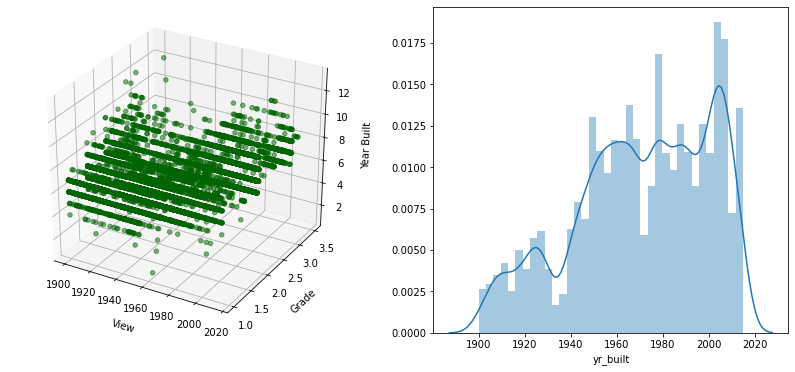

In [7]:
fig=plt.figure(figsize=(14,6))
#fig, axes = plt.subplots()
#ax2 = sns.countplot(x="grade",
#                  data=df_usa, ax=ax2)
#plt.xlabel('Year of built',weight='bold');
ax = fig.add_subplot(1,2,1, projection="3d")
ax.scatter(df['yr_built'],df['floors'],df['grade'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\nYear Built');

ax = fig.add_subplot(1,2,2)
sns.distplot(df['yr_built'],ax=ax)
plt.show()

### Price Relations

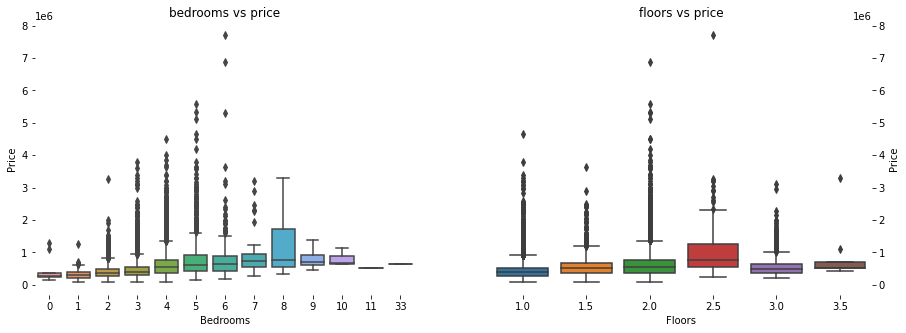

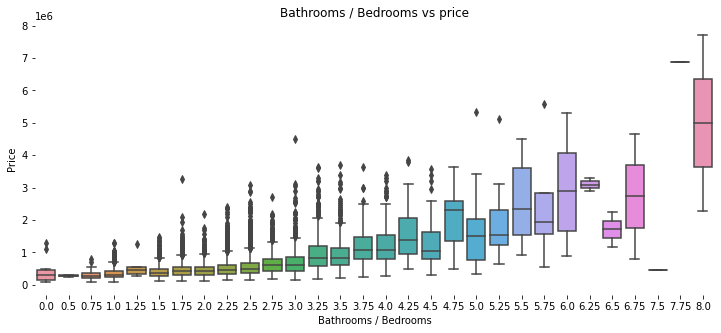

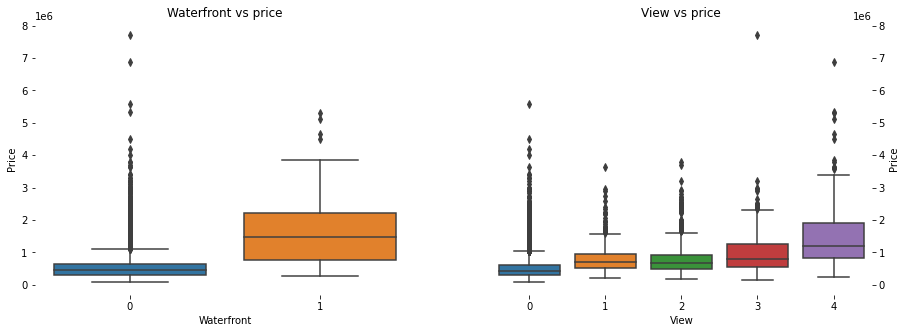

In [8]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(title ='bedrooms vs price',xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(title = 'floors vs price',xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(title='Bathrooms / Bedrooms vs price',xlabel='Bathrooms / Bedrooms', ylabel='Price');


f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(title='Waterfront vs price',xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(title='View vs price',xlabel='View', ylabel='Price');

**Bedrooms vs Price:**
 Eight bedrooms houses have the highest median price.
 Three bedrooms houses are the most available in the market with segnificate low median price.
 Three bedrooms houses prices have low variance compared to eight bedroom houses.
 For more ten bedrooms for a house is considered as a luxury houses and they are very rare.

**Waterfront vs Price** 
This feature can be considered as luxury feature as median price of houses with waterfront 3 times more than houses without waterfront. Houses with waterfront are rare in the market because of its high price compared to other houses. Also, with 3 times higher standard deviation than other houses these are characteristics of luxury houses. So, Waterfront houses in this market are luxury houses.

**Veiws** 
The more beautiful is the sight the more the price which makes sense. but what is confusing in this dataset that the bad view are the dominant. and dataset are not make it clear about how the measurement of how good the view is.

# Relationship between the variables (Optional)

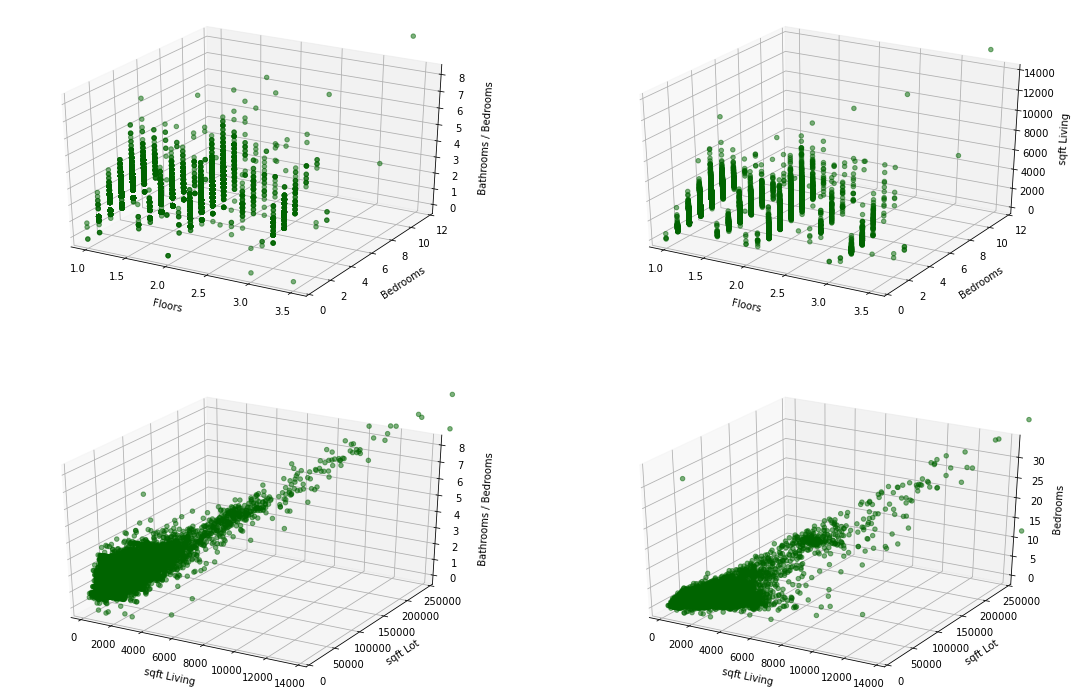

In [9]:
fig = plt.figure(figsize=(19,12.5))
ax = fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax = fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax = fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax = fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

# Model

### **Data Preprocessing**

### Binning
>*Data binning is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value.*<br>
**Binnig Process:**<br>
**First**: *Extract new features **Age** the diffrence between the sales year and the build year, Then **age_rnv** the diffrence between the sales year and the renovated year.*<br>
**Second:** *To make use of these data properly, They have to be converted to discrete values **Dummies variables** but first the have to converted using the binning method.*
*The new features are divided into partitions each of them hold range of data.*




In [10]:
df_dm =df.copy()

df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isna()]=0

bins = [-2,0,5,10,25,50,75,100,200]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)

bins = [-2,0,5,10,25,50,75,200]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

<ipython-input-10-9ee613775433>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['age_rnv'][df_dm['age_rnv'].isna()]=0


## **Multiple Linear Regressor** sklearn lib

**LinearRegression** fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.<br>
After binning the data to make use of it. Feature selection is used to define and select the feature which helps the model to learn faster and have more performance without fall into overfitting when using to many feature as independant variables,so model memorize the data without generlizes it and have bad results during predict test data.fall into underfitting when using few number of features then the model cannot learn or predict properly the train data.

##### **Returns:**
**R_square coeff**: The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0<br>
In This model all features are included as they achieve higher **R_square** 0.7 for both training, testing and **Root mean square error** 202392.697, **cross validation scroe** 0.7.


In [11]:
from sklearn import linear_model
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

#sdr = MinMaxScaler()
#train_data_dm[features] = sdr.fit_transform(train_data_dm[features])
#test_data_dm[features] = sdr.fit_transform(test_data_dm[features])

regressor = linear_model.LinearRegression()
regressor.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(regressor.intercept_))
print('Coefficients: {}'.format(regressor.coef_))

pred = regressor.predict(test_data_dm[features])


rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(regressor.score(train_data_dm[features],train_data_dm['price']),'.3f'))
rtecm = float(format(regressor.score(test_data_dm[features],test_data_dm['price']),'.3f'))
cv = float(format(cross_val_score(regressor,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

filename = 'Multiple_Linear_Regressor.sav'
pickle.dump(regressor, open(filename, 'wb'))

print(f'RMSE: {rmsecm}')
print(f'rtrcm: {rtrcm}')
print(f'rtecm: {rtecm}')
print(f'Cross Validation: {cv}')

Intercept: 3875099.3997331243
Coefficients: [-3.25698817e+04  4.02678267e+04  1.05838677e+02  1.42326271e-01
 -1.43270879e+04  5.37841745e+05  5.75318444e+04  3.25489677e+04
  9.57189564e+04  6.82114675e+01  3.76272343e+01 -4.11193503e+04
 -4.88713398e+04 -6.71491542e+04 -8.72131189e+04 -6.16454360e+04
  3.15520347e+04  1.19998547e+05  1.54447818e+05 -1.36184987e+04
  1.08458909e+05  8.03287392e+04  5.27111160e+04 -2.99261838e+04
 -1.13817522e+05 -8.41365592e+04 -5.89903592e+02  6.00010714e+05
 -2.02884643e+05  2.41375474e+01 -2.71234033e-01]
RMSE: 202392.697
rtrcm: 0.706
rtecm: 0.71
Cross Validation: 0.702


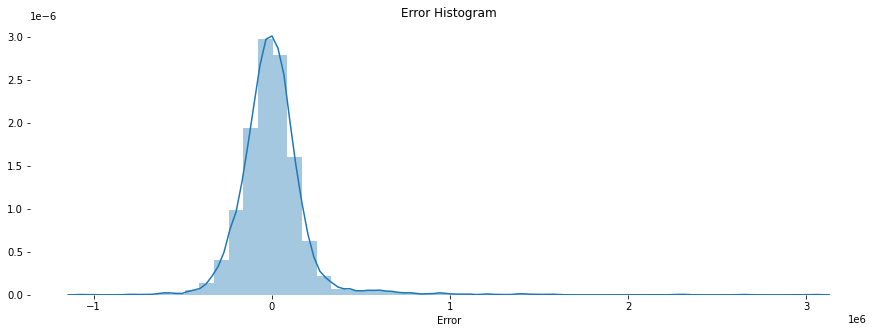

In [12]:
f, axes = plt.subplots(1, 1,figsize=(15,5))
y_true = np.array(test_data_dm['price'])
errors = y_true - pred
sns.distplot(errors, ax=axes)
sns.despine(left=True, bottom=True)
axes.set(xlabel='Error', ylabel='', title='Error Histogram');

looking to the histogram of the errors. The distribution shows that the more number of errors happend between (+/-)202000 as it shown in **RMSE**. 